# trigger correction

Given the fast/continuous pace of stimulus presentation, EEG event markers might sometimes be written indirectly into the EEG marker file, depending on specific hardware interactions.  
Rather than catching all cases of such interactions, we considered it more goal-directed to provide the following post-hoc fix.  
The fix uses the information from the automatically written log (i.e. *.npz) files and combines it with the absolute timing from the EEG marker file.

## how to use

1. adjust the paths in the cell below as needed.
2. if you want to run all the files in the inpath directory, no further adjustments are needed  
alternatively, you can choose a subset of files based on sbjcode (default: "all"), task (default: "all"), and group (default: "", i.e. no group). All these input arguments can be a single string value, or a list of strings. _note that groups parameter MUST be set explicitly if you have groups in the filename that determine file matching._
3. run the cell below.
4. collect the files from the output folder and import to your EEG marker file with appropriate software. the naming of the files is the same as the filename stem of the EEG marker files.

## notes on plots

You can specify whether or not you want output diagnostic plots in this notebook. For that, set any of the parameters ``diag_plot_1`` or ``diag_plot_2`` in the call to ``BatchPosthocTriggerFix`` to **True** or **False** depending on your needs.  

### if diag_plot_1 set to True (default; highly recommended)
With this diag plot, you may visually check the match of each file.  

![title](plot_1_illu.png)

- **middle black lines**: matches
- **green lines**: markers only in log file (i.e., *.npz)
- **red lines**: markers only in EEG marker file, but NOT ghost trigger
- **grey lines**: markers only in vmrk: "ghost" trigger (i.e. a trigger number not defined in decoding table)  

For example, it is a BAD indicator if N green lines >= N black lines (not counting green lines at beginning/end, esp. before 0).  
In that case, you should run another batch with tweaked parameters (copy the code cell, or replace its content).  
Parameters to tweak are:
- **high_accuracy**: if True, slower calculations but possible more correct
- **only_middle**: default True; only consider the middle 50% of each for matches. If False, consider all.
- **samp_uncertainty**: how many samples npz and vmrk can deviate (in EEG samples (TODO: double check))
- **nth_best**: lags are sorted according to a (rarely maybe suboptimal) optimization criterion. if suspected that the first in the list is not the best, the user can change it to the 2nd, 3rd, 513th, ... best
- **allow_manual_mode**: self-explanatory

parameters within the functions need to be adjusted. Contact the developers.

### if diag_plot_2 set to True (not default; often not needed)
A possible, but less likely case happens when the time jitter between npz and vmrk is higher than the initial value of 20 EEG samples. This can be diagnosed via ``diag_plot_2 = True`` in the call to ``BatchPosthocTriggerFix``.

![title](plot_2_illu.png)

As you can see in this example plot, no issue exists: the range of sample deviances npz and vmrk of an assumed match is lower than the set range of 20 - and more importantly, there is no outlier.

If that's not the case, you have to tweak the value ``samp_uncertainty`` in the call to ``BatchPosthocTriggerFix`` accordingly.

# code cells

In [1]:
from trigfix.trigger_compare_functions import *

# either put EEG and logfiles into emp_fpath below, or adjust the path.
emp_fpath = root_path/"data"/"inpath"
outpath   = root_path/"data"/"outpath"

In [2]:
%matplotlib qt
%matplotlib widget

In [3]:
batch = BatchPosthocTriggerFix(
    lab="EEG1", 
    inpath=emp_fpath, 
    outpath=outpath,
    samp_uncertainty=20,
    diag_plot_1=True,
    allow_manual_mode=True
    )

batch.apply_fix(groups="all", tasks="A", sbjcodes="S31") #, sbjcodes="S14"

task_A_22-05-17_20-07_S02.npz
s02
A


IndexError: list index out of range

interactive(children=(FloatSlider(value=1.0, description='factor', layout=Layout(width='800px'), max=2.0, step…

<function __main__.update(factor=1.0, offset=0.0)>

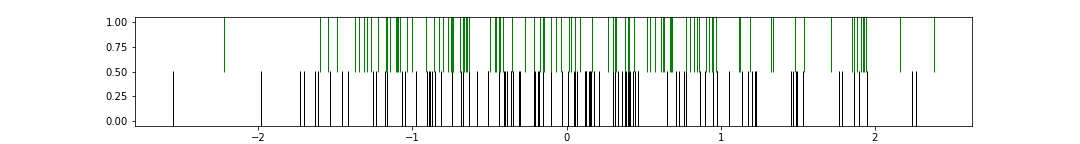

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# For example purpose, create 2 dataframes
np.random.seed(0)
df1 = pd.DataFrame({'value': np.random.randn(100)})
df2 = pd.DataFrame({'value': np.random.randn(100)})

slider_layout = widgets.Layout(width='800px')

fig, ax = plt.subplots(figsize=(15, 2))
vlines_df1, = ax.plot(df1["value"], [0]*len(df1), "|", color="black", markersize=100)
vlines_df2, = ax.plot(df2["value"], [1]*len(df1), "|", color="green", markersize=100)
ax.set_xlabel("time in samples")

def update(factor=1.0, offset=0.0):
    vlines_df2.set_xdata(df2["value"]*factor + offset)

widgets.interact(
    update, 
    factor=widgets.FloatSlider(min=0, max=2.0, step=0.001, value=1.0, layout=slider_layout), 
    offset=widgets.FloatSlider(min=-5.0, max=5.0, step=0.001, value=0.0, layout=slider_layout)
    )

In [6]:
update(1.0, 0.0)

In [15]:
npz.npz

In [14]:
np.load(npz.npz)

TypeError: expected str, bytes or os.PathLike object, not NpzFile

In [4]:
npz_time_A  = NpzDF         (emp_fpath/"task_C_22-06-24_13-21_S23.npz").df["time"].tolist()
vmrk_time_A = EEGLabOutputDF(emp_fpath/"S23_events_task_C_fixed.txt")  .df["time"].tolist()

npz_time_B  = NpzDF         (emp_fpath/"task_C_22-12-09_13-03_S56.npz").df["time"].tolist()
vmrk_time_B = EEGLabOutputDF(emp_fpath/"S56_events_task_C_fixed.txt")  .df["time"].tolist()

npz_time_X  = NpzDF         (emp_fpath/"task_C_23-01-11_20-02_S65.npz").df["time"].tolist()
vmrk_time_X = EEGLabOutputDF(emp_fpath/"S65_events_task_C_fixed.txt")  .df["time"].tolist()

c:\users\a\documents\ag beste\emulation-task\actionemutask_NA\globals.py:411: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self.read_file()


In [7]:
len(vmrk_time_X), len(npz_time_X)

(525, 1458)

In [9]:
batch.

,sbjcode,task,group,vmrk_f,npz_f
0,s01,A,,S01_events_task_A_fixed.txt,task_A_22-06-11_13-56_S01.npz
1,s01,B,,S01_events_task_B_fixed.txt,task_B_22-06-11_14-11_S01.npz
2,s01,C,,S01_events_task_C_fixed.txt,task_C_22-06-11_14-25_S01.npz
3,s01,D,,S01_events_task_D_fixed.txt,task_D_22-06-11_14-39_S01.npz
4,s02,A,,S02_events_task_A_fixed.txt,task_A_22-05-17_20-07_S02.npz
...,...,...,...,...,...
287,s77,C,,S77_events_task_C_fixed.txt,task_C_23-02-15_13-47_S77.npz
288,s77,D,,S77_events_task_D_fixed.txt,task_D_23-02-15_14-02_S77.npz
289,s81,A,,S81_events_task_A_fixed.txt,task_A_23-04-05_11-24_S81.npz
290,s81,B,,S81_events_task_B_fixed.txt,task_B_23-04-05_11-38_S81.npz
